<a href="https://www.kaggle.com/code/mattop/pennsylvania-counties-us-census-data-cleaning?scriptVersionId=98550768" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**This is a data cleaning notebook. Link to dataset:** [US Census PA Employment and Population Dataset](https://www.kaggle.com/datasets/mattop/us-census-pa-employment-and-population-data) **Feedback is appreciated!**

**Basic data cleaning on data from the U.S. Census Bureau, 2016-2020 American Community Survey 5-Year Estimates. The objective is to get started working with and visualizing the data as quickly as possible.**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno #describe data
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/us-census-pa-employment-and-population-data/pennsylvaniacensus.csv


In [2]:
df = pd.read_csv("/kaggle/input/us-census-pa-employment-and-population-data/pennsylvaniacensus.csv")

In [3]:
df.head()

,DP03_0001E,DP03_0001M,DP03_0001PE,DP03_0001PM,DP03_0002E,DP03_0002M,DP03_0002PE,DP03_0002PM,DP03_0003E,DP03_0003M,...,DP03_0136M,DP03_0136PE,DP03_0136PM,DP03_0137E,DP03_0137M,DP03_0137PE,DP03_0137PM,GEO_ID,county,fips
0,84387,137,84387,NaN,53245,910,63.1,1.1,53200,911,...,NaN,6.2,0.8,NaN,NaN,17.4,1.8,0500000US42001,Adams,42001.0
1,1015608,631,1015608,NaN,660484,3044,65.0,0.3,659555,3038,...,NaN,7.7,0.4,NaN,NaN,21.3,0.7,0500000US42003,Allegheny,42003.0
2,54444,101,54444,NaN,31615,519,58.1,1.0,31593,518,...,NaN,8.4,1.1,NaN,NaN,23.8,2.2,0500000US42005,Armstrong,42005.0
3,136682,202,136682,NaN,84153,1035,61.6,0.7,84051,1040,...,NaN,6.8,0.7,NaN,NaN,20.8,1.3,0500000US42007,Beaver,42007.0
4,40064,86,40064,NaN,23144,447,57.8,1.1,23140,447,...,NaN,8.0,1.2,NaN,NaN,25.0,3.2,0500000US42009,Bedford,42009.0


In [4]:
df.shape

(68, 551)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Columns: 551 entries, DP03_0001E to fips
dtypes: float64(298), int64(251), object(2)
memory usage: 292.8+ KB


<AxesSubplot:>

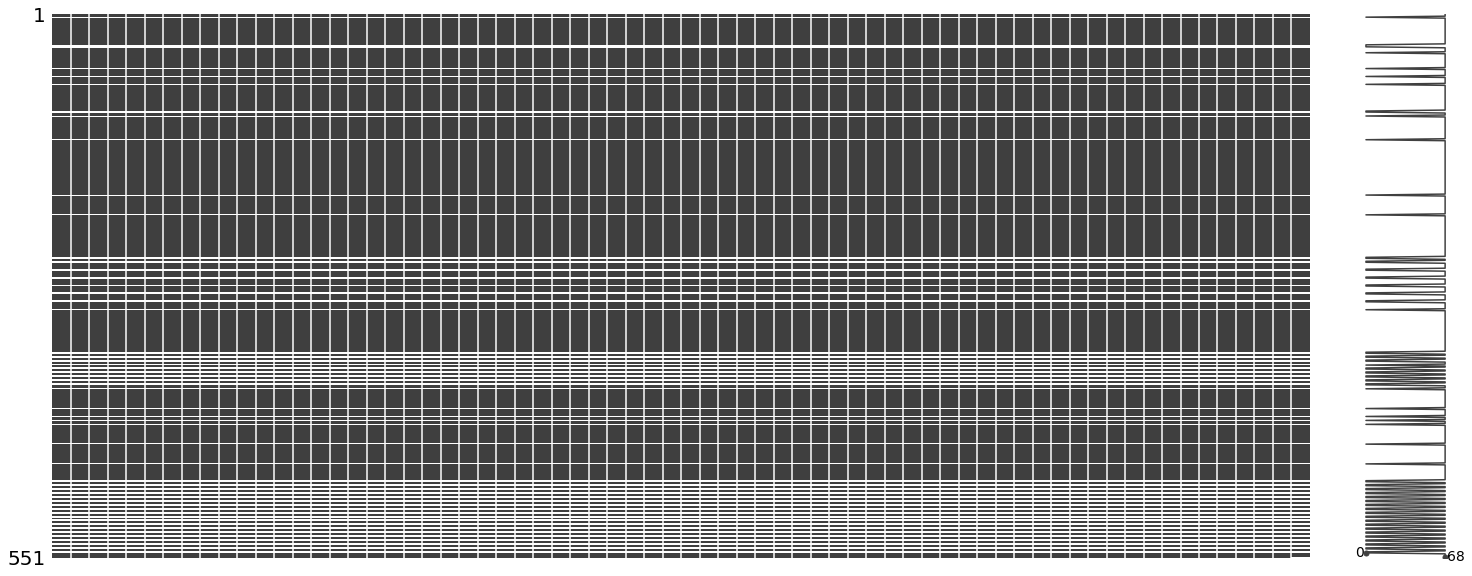

In [6]:
# Creating temporary DataFrame to flip rows and columns for better looking matrix
dfmsno = df.transpose()
msno.matrix(dfmsno)

**The column header names do not provide a good description of the data. I located the columns that I wanted to use and created a dictionary with the key value pairs for the column header names which can be seen below.**

**I also added a FIPS county code column to the dataset for each county in Pennsylvania.** FIPS is a five-digit Federal Information Processing Standards code which uniquely identifies counties in the United States. **We can use FIPS along with geojson to create Choropleth Maps.**

In [7]:
# Dictionary of all renamed columns
# All of the renamed columns are ESTIMATES from the U.S. Census Bureau
# Columns not renamed include: Percent, Margin of Error, Percent Margin of Error

dict = {# Employment Status
        # Population 16 years and over
        "DP03_0001E" : "total_population", # Total Population elgible for work
        "DP03_0002E" : "labor_force",
        "DP03_0003E" : "civ_labor_force",
        "DP03_0004E" : "total_employed",
        "DP03_0005E" : "total_unemployed",
        "DP03_0006E" : "armed_forces",
        "DP03_0007E" : "not_in_labor_force",
    

        # Females 16 years and over
        "DP03_0010E" : "total_population_female", # Total Population elgible for work
        "DP03_0011E" : "labor_force_female",
        "DP03_0012E" : "civ_labor_force_female",
        "DP03_0013E" : "civ_labor_force_female_employed",
    

        # Households with children
        "DP03_0014E" : "household_children_under_6", # Own children of the householder under 6 years
        # All parents in family in labor force
        "DP03_0015E" : "parents_work_children_under_6", # Own children of the householder under 6 years
        "DP03_0016E" : "household_children_6to17", # Own children of the householder 6 to 17 years
        # All parents in family in labor force
        "DP03_0017E" : "parents_work_children_6to17", # Own children of the householder 6 to 17 years
    

        # Commuting to work
        "DP03_0018E" : "total_workers_commute",
        "DP03_0019E" : "solo_vehicle_commute", # Car, truck, or van -- drove alone
        "DP03_0020E" : "carpool_commute", # Car, truck, or van -- carpooled
        "DP03_0021E" : "public_transportation_commute", # Public transportation (excluding taxicab)
        "DP03_0022E" : "walked_commute",
        "DP03_0023E" : "other_means_commute",
        "DP03_0024E" : "worked_from_home",
        "DP03_0025E" : "mean_commute_time_minutes",
    

        # Occupation
        "DP03_0027E" : "manage_business_sci_art", # Management, business, science, and arts occupations
        "DP03_0028E" : "service_occupations",
        "DP03_0029E" : "sales_and_office_occupations",
        # Natural resources, construction, and maintenance occupations
        "DP03_0030E" : "nr_construction_and_maintenance",
        # Production, transportation, and material moving occupations
        "DP03_0031E" : "production_transportation_mm",
    

        # Industry
        "DP03_0033E" : "ag_forest_fish_hunt_mine", # Agriculture, forestry, fishing and hunting, and mining
        "DP03_0034E" : "construction",
        "DP03_0035E" : "manufacturing",
        "DP03_0036E" : "wholesale_trade",
        "DP03_0037E" : "retail_trade",
        "DP03_0038E" : "transportation_warehousing_utilities",
        "DP03_0039E" : "information",
        "DP03_0040E" : "firerl", # Finance, insurance, real estate, rental and leasing
        # Professional, scientific, and management, and administrative and waste management services
        "DP03_0041E" : "psmawms",
        # Educational services, and health care and social assistance
        "DP03_0042E" : "education_health_care_social",
        # Arts, entertainment, and recreation, and accommodation and food services
        "DP03_0043E" : "art_entertainment_accommodation",
        "DP03_0044E" : "other_services", # Other services, except public administration
        "DP03_0045E" : "public_administration",
    

        # Class of worker
        "DP03_0047E" : "private_wage_and_salary_worker",
        "DP03_0048E" : "government_worker",
        "DP03_0049E" : "self_employed_worker", # Self-employed in own not incorporated business workers
        "DP03_0050E" : "unpaid_family_worker",
    

        # Income and benefits (in 2020 inflation-adjusted dollars)
        # Total households
        "DP03_0051E" : "total_households",
        "DP03_0052E" : "household_less_than_10k",
        "DP03_0053E" : "household_10k_to_15k", # $10,000 to $14,999
        "DP03_0054E" : "household_15k_to_25k", # $15,000 to $24,999
        "DP03_0055E" : "household_25k_to_35k", # $25,000 to $34,999
        "DP03_0056E" : "household_35k_to_50k", # $35,000 to $49,999
        "DP03_0057E" : "household_50k_to_75k", # $50,000 to $74,999
        "DP03_0058E" : "household_75k_to_100k", # $75,000 to $99,999
        "DP03_0059E" : "household_100k_to_150k", # $100,000 to $149,999
        "DP03_0060E" : "household_150k_to_200k", # $150,000 to $199,999
        'DP03_0061E' : "household_200k_plus", # $200,000 or more
        "DP03_0062E" : "household_median_income", # dollars
        "DP03_0063E" : "household_mean_income", # dollars

    
        # Families
        "DP03_0075E" : "total_families",
        "DP03_0076E" : "family_less_than_10k",
        "DP03_0077E" : "family_10k_to_15k", # $10,000 to $14,999
        "DP03_0078E" : "family_15k_to_25k", # $15,000 to $24,999
        "DP03_0079E" : "family_25k_to_35k", # $25,000 to $34,999
        "DP03_0080E" : "family_35k_to_50k", # $35,000 to $49,999
        "DP03_0081E" : "family_50k_to_75k", # $50,000 to $74,999
        "DP03_0082E" : "family_75k_to_100k", # $75,000 to $99,999
        "DP03_0083E" : "family_100k_to_150k", # $100,000 to $149,999
        "DP03_0084E" : "family_150k_to_200k", # $150,000 to $199,999
        "DP03_0085E" : "family_200k_plus", # $200,000 or more
        "DP03_0086E" : "family_median_income", # dollars
        "DP03_0087E" : "family_mean_income", # dollars
        "DP03_0088E" : "per_capita_income",

    
        # Nonfamily Households
        "DP03_0089E" : "total_nonfamily_households",
        "DP03_0090E" : "nonfamily_median_income", # dollars
        "DP03_0091E" : "nonfamily_mean_income", # dollars
    
    
        # Median Earnings
        "DP03_0092E" : "median_earnings_for_workers", # dollars
        "DP03_0093E" : "median_earnings_male_fulltime", # dollars
        "DP03_0094E" : "median_earnings_female_fulltime", # dollars

    
        # Health Insurance Coverage
        "DP03_0095E" : "total_civ_population", # Total Civilian Noninstitutionalized Population
        "DP03_0096E" : "civ_health_insurance_coverage", # Population
        "DP03_0097E" : "civ_private_health_insurance", # Population
        "DP03_0098E" : "civ_public_health_insurance", # Population
        "DP03_0099E" : "civ_no_health_insurance"} # Population

df.rename(columns = dict, inplace = True)

In [8]:
# Dropping the columns where all elements are NaN:
df = df.dropna(axis = 1, how = "all")

In [9]:
df.head()

,total_population,DP03_0001M,DP03_0001PE,labor_force,DP03_0002M,DP03_0002PE,DP03_0002PM,civ_labor_force,DP03_0003M,DP03_0003PE,...,DP03_0134PM,DP03_0135PE,DP03_0135PM,DP03_0136PE,DP03_0136PM,DP03_0137PE,DP03_0137PM,GEO_ID,county,fips
0,84387,137,84387,53245,910,63.1,1.1,53200,911,63.0,...,0.8,5.7,0.9,6.2,0.8,17.4,1.8,0500000US42001,Adams,42001.0
1,1015608,631,1015608,660484,3044,65.0,0.3,659555,3038,64.9,...,0.3,8.5,0.6,7.7,0.4,21.3,0.7,0500000US42003,Allegheny,42003.0
2,54444,101,54444,31615,519,58.1,1.0,31593,518,58.0,...,1.0,9.2,1.6,8.4,1.1,23.8,2.2,0500000US42005,Armstrong,42005.0
3,136682,202,136682,84153,1035,61.6,0.7,84051,1040,61.5,...,0.7,7.2,0.9,6.8,0.7,20.8,1.3,0500000US42007,Beaver,42007.0
4,40064,86,40064,23144,447,57.8,1.1,23140,447,57.8,...,1.6,9.4,1.6,8.0,1.2,25.0,3.2,0500000US42009,Bedford,42009.0


In [10]:
df.describe().style.background_gradient(cmap = "plasma")

In [11]:
# The Pennsylvania row in the county column contains the total combined data from each PA county
df0 = df[df["county"] == "Pennsylvania"]
df = df[df["county"] != "Pennsylvania"]

**This concludes the data cleaning. Thank you for viewing this notebook. Please feel free to provide any feedback on this notebook or the dataset associated with it!**